In [ ]:
from cute_viz import display_tv_layout
import torch
from functools import partial
from typing import List

import cutlass
import cutlass.cute as cute
from cutlass.cute.runtime import from_dlpack
from cutlass.cute import KeepPTX, KeepCUBIN
import cupy as cp
from cutlass.torch import dtype as torch_dtype
import cutlass.cute.runtime as cute_rt

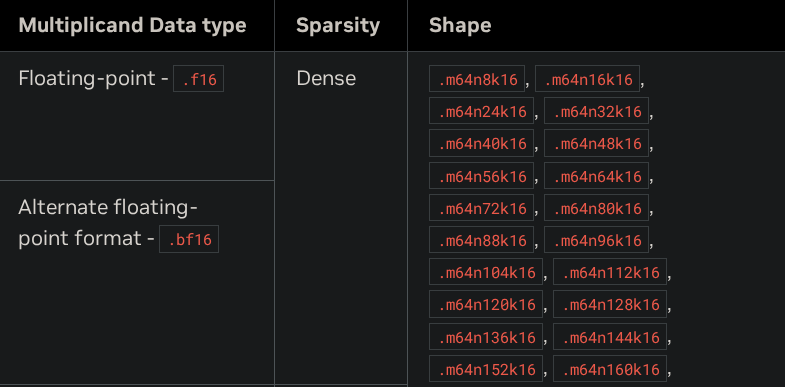


indeed we are dealing with .bf16, f32 accumulator, and we have problem shape (64,N,16)
so what is the layout of register fragments for A? well A shape is fixed at (64,16) so only one way to do it
also we have warp group, so 4 warps, lets see. 
at the granularity of warpgroup (see picture below) for A matrix, each warp holds a 16,16 chunk 
so imagine my layout is A = (64,16):(16,1) (row major) then we need to tile it with the layout (4:1)



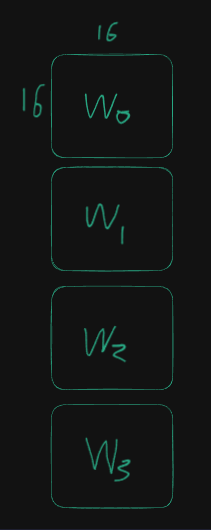